In [1]:
# %load_ext autoreload

import numpy as np
# %matplotlib notebook  # interactive plots
import matplotlib.pylab as plt

from mim_data_utils import DataReader

np.set_printoptions(suppress=True, precision=2, sign=' ')
from scipy.spatial.transform import Rotation
from scipy.stats import describe

import pinocchio as pin
from robot_properties_solo.solo12wrapper import Solo12Config

In [2]:
plt.rcParams['figure.dpi'] = 144  # default 72.0

# Init Data

In [3]:
pin_robot = Solo12Config.buildRobotWrapper()
reader = DataReader('../2021-07-20_11-10-52_reactive.mds')

idx: 0 fields: 21
[('x_des', 12), ('xd_des', 12), ('w_com', 6), ('kc', 3), ('dc', 3), ('kb', 3), ('db', 3), ('joint_positions', 12), ('joint_velocities', 12), ('slider_positions', 4), ('imu_gyroscope', 3), ('zero_sliders', 4), ('control_time', 1), ('q', 19), ('dq', 18), ('com', 3), ('rel_eff', 12), ('vicon_leg_hl', 13), ('F', 12), ('dx_des', 12), ('tau', 18)]


In [4]:
reader_q = reader.data['q']
reader_dq = reader.data['dq']
reader_tau = reader.data['tau']
reader_vicon_leg = reader.data['vicon_leg_hl']


In [5]:
# plot xyz of forward kinematics
forwardK = np.empty((reader_q.shape[0], 3))
for ms in range(reader_q.shape[0]):
    q = reader_q[ms]
#     dq = all_dq[ms]
    pin_robot.computeJointJacobians(q)
#     pin_robot.forwardKinematics(q)
    pin_robot.framesForwardKinematics(q)
    forwardK[ms] = pin_robot.data.oMf[pin_robot.model.getFrameId('HL_ANKLE')].translation

35
33


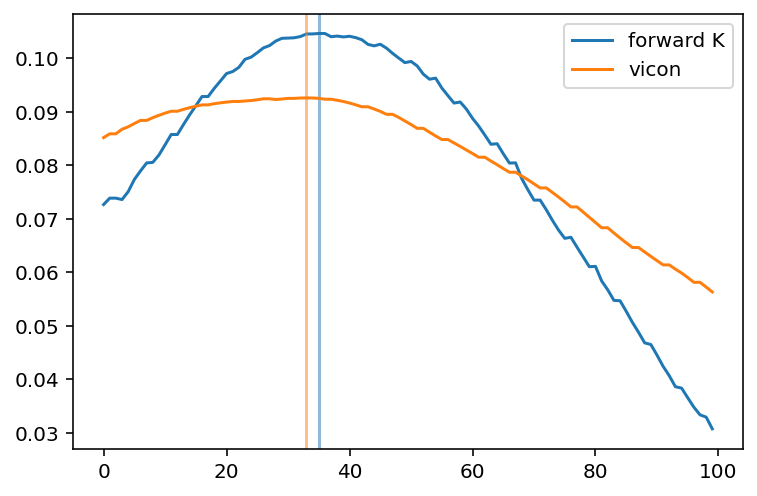

In [6]:
s = slice(1100, 1200)
plt.plot(forwardK[s, 2], label='forward K')
_arg = np.argmax(forwardK[s, 2])
plt.axvline(x=_arg, color='C0', alpha=0.5)
print(_arg)

plt.plot(reader_vicon_leg[s, 2], label='vicon')
_arg = np.argmax(reader_vicon_leg[s, 2])
plt.axvline(x=_arg, color='C1', alpha=0.5)
print(_arg)

plt.legend()
plt.show()

Text(0.5, 1.0, 'bounds')

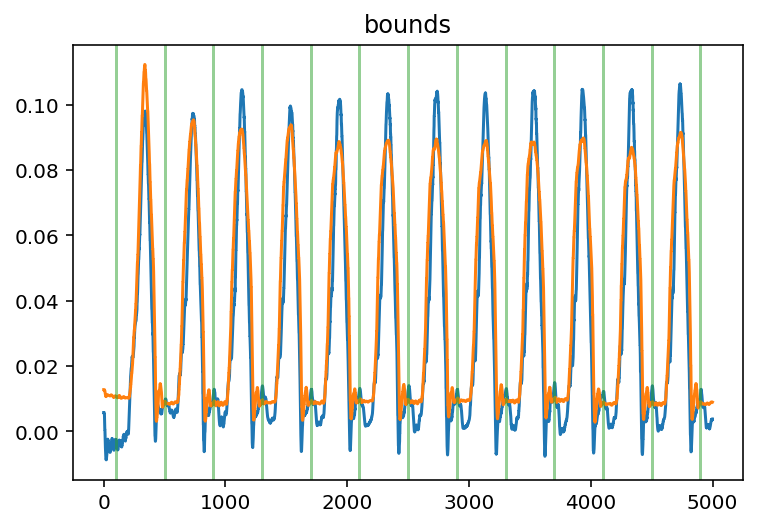

In [7]:
cell_slice = slice(0, -1)  # for this cell

plt.plot(forwardK[cell_slice, 2])
plt.plot(reader_vicon_leg[cell_slice, 2])

for l in range(100, 5002, 400):  # l := left boundary
    plt.axvline(x=l, color='C2', alpha=0.5)

plt.title('bounds')

forwardK: overall 425 relative 225
vicon   : overall 433 relative 233
vicon - forwardK: 8


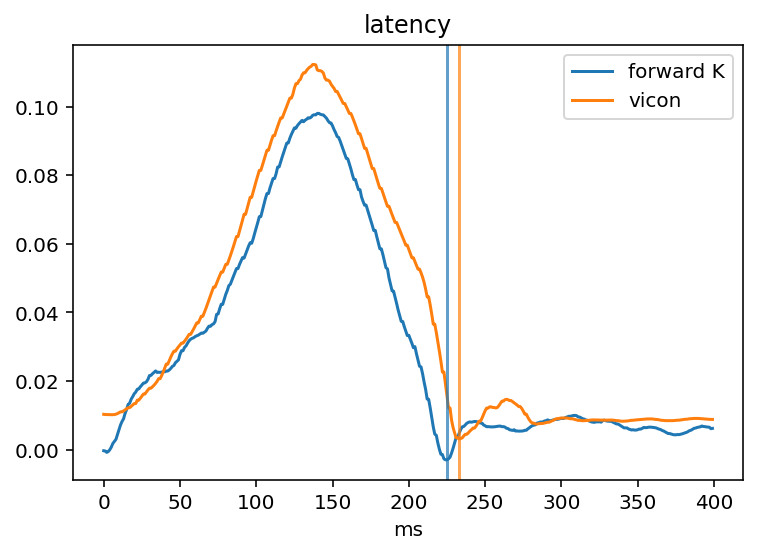

forwardK: overall 825 relative 225
vicon   : overall 834 relative 234
vicon - forwardK: 9


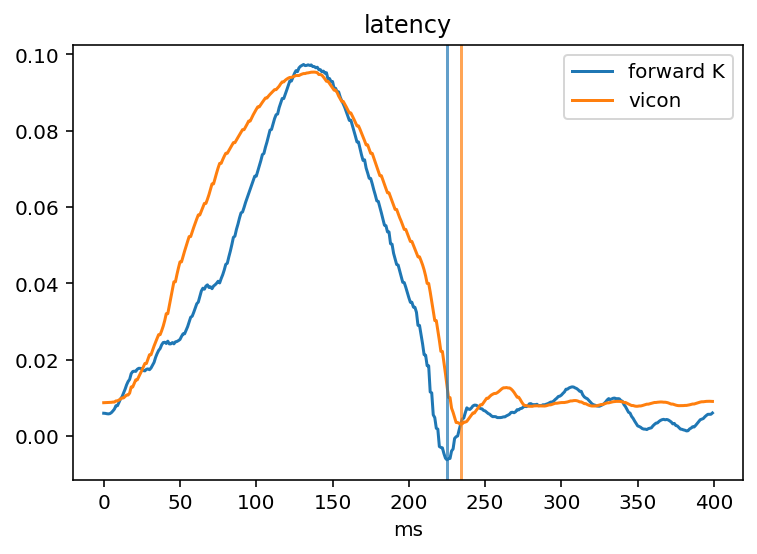

forwardK: overall 1224 relative 224
vicon   : overall 1233 relative 233
vicon - forwardK: 9


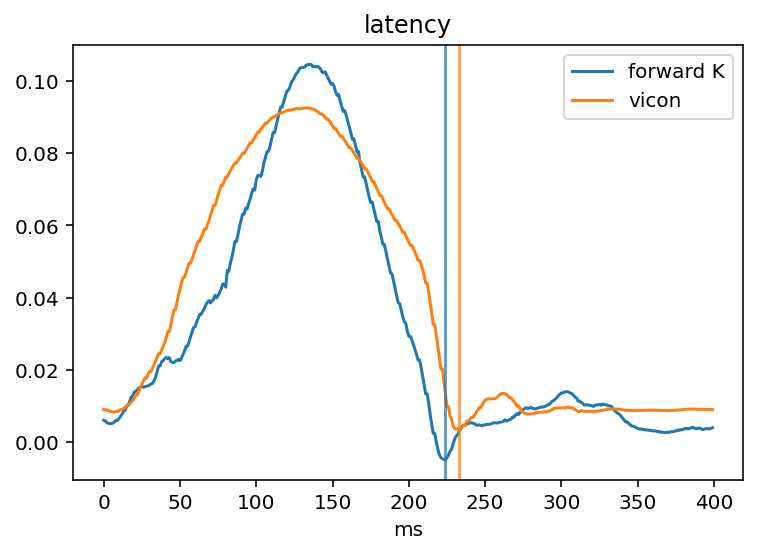

forwardK: overall 1623 relative 223
vicon   : overall 1633 relative 233
vicon - forwardK: 10


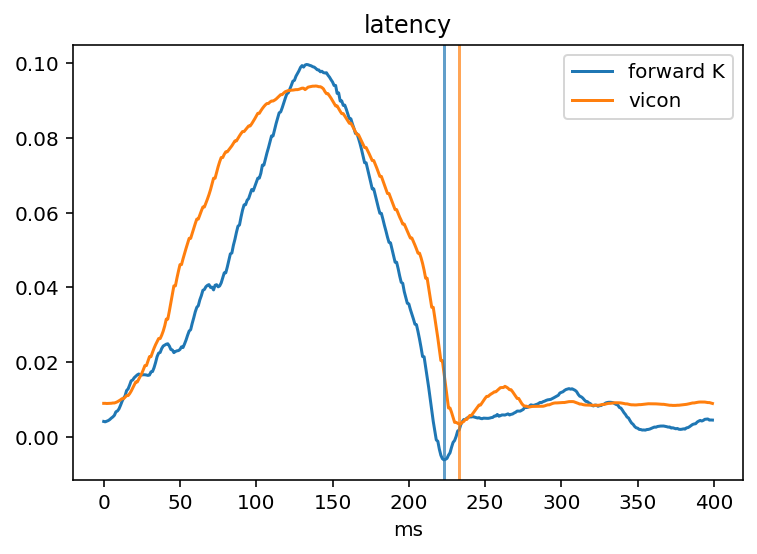

forwardK: overall 2024 relative 224
vicon   : overall 2033 relative 233
vicon - forwardK: 9


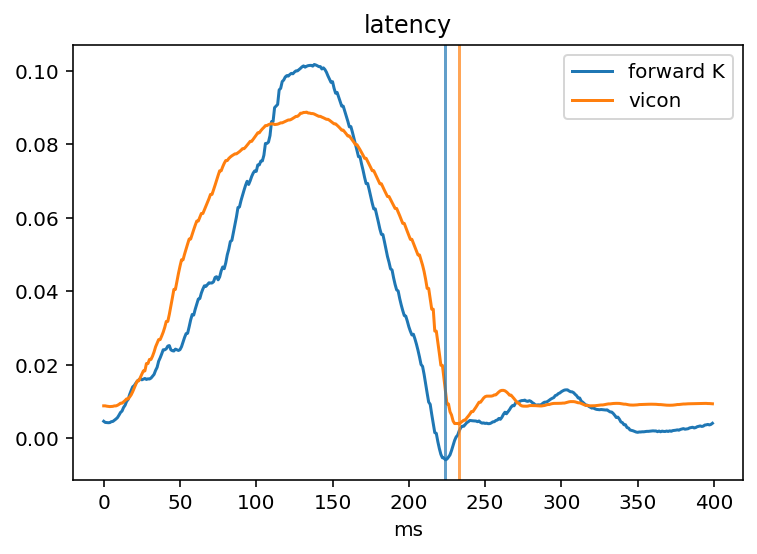

forwardK: overall 2424 relative 224
vicon   : overall 2434 relative 234
vicon - forwardK: 10


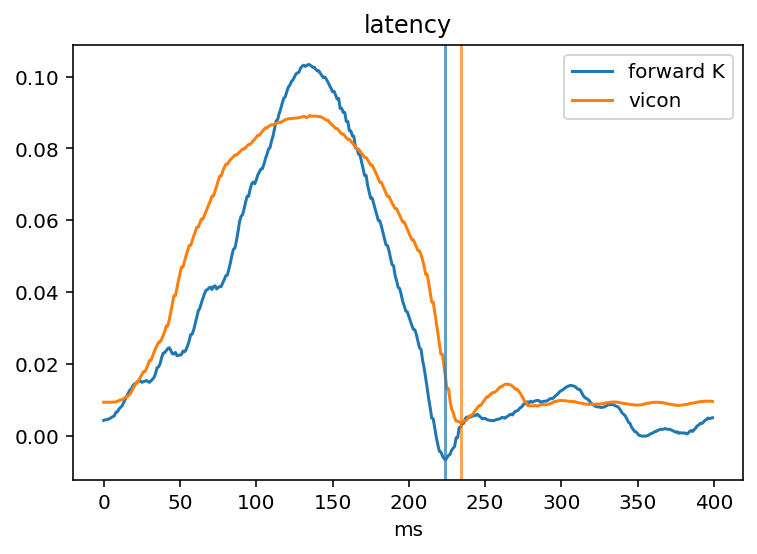

forwardK: overall 2824 relative 224
vicon   : overall 2833 relative 233
vicon - forwardK: 9


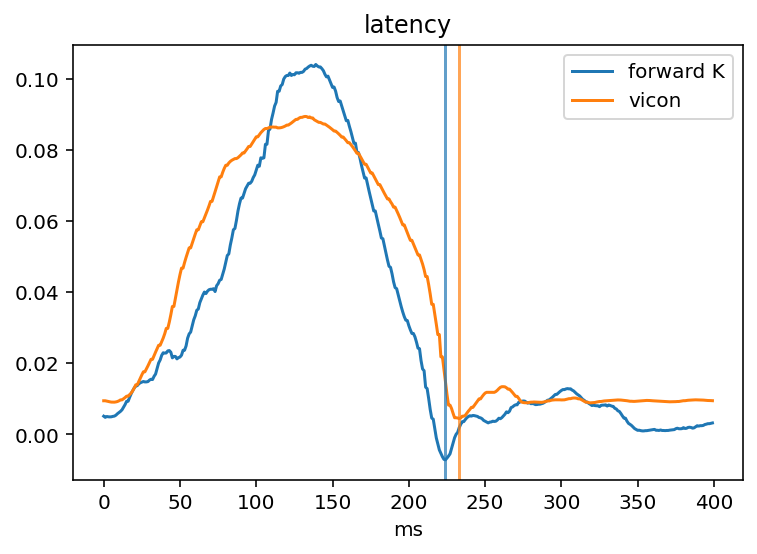

forwardK: overall 3223 relative 223
vicon   : overall 3234 relative 234
vicon - forwardK: 11


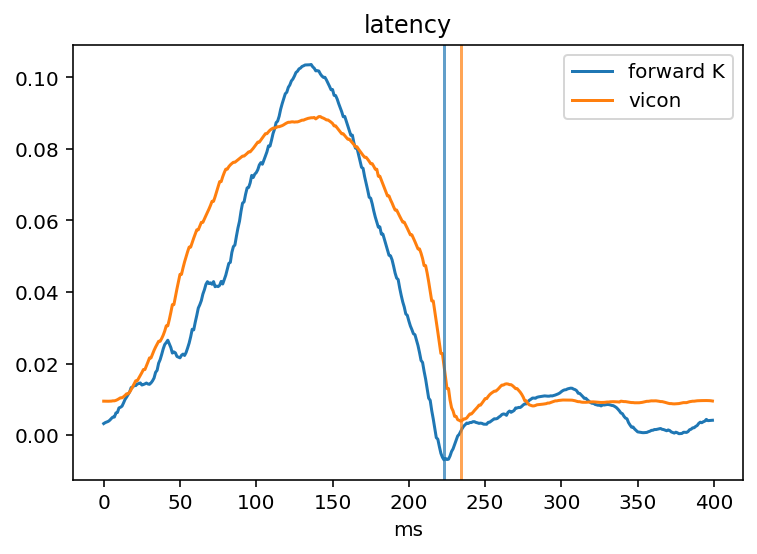

forwardK: overall 3623 relative 223
vicon   : overall 3633 relative 233
vicon - forwardK: 10


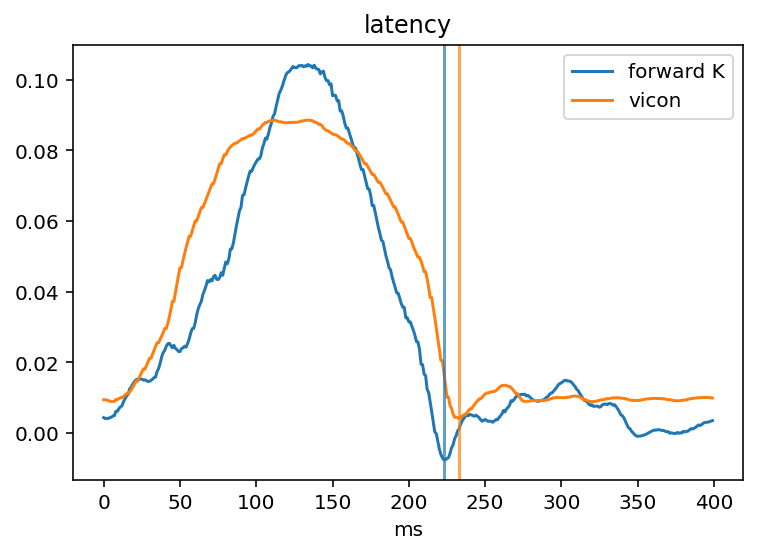

forwardK: overall 4023 relative 223
vicon   : overall 4034 relative 234
vicon - forwardK: 11


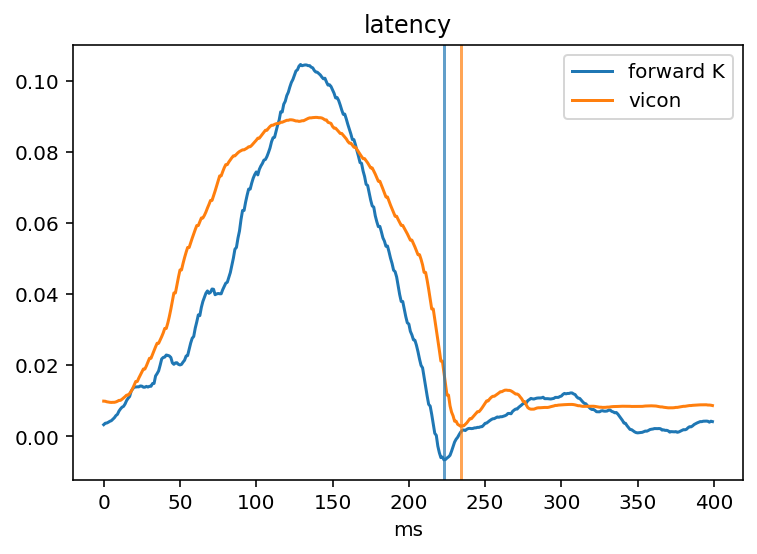

forwardK: overall 4424 relative 224
vicon   : overall 4434 relative 234
vicon - forwardK: 10


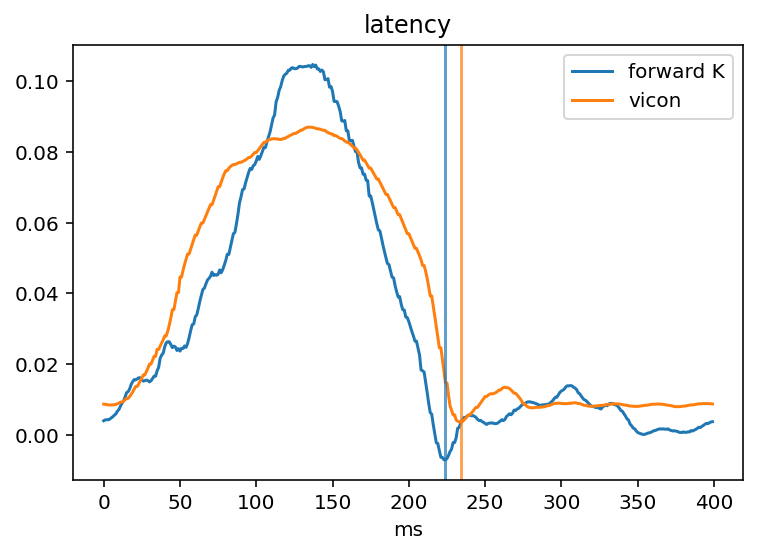

forwardK: overall 4823 relative 223
vicon   : overall 4833 relative 233
vicon - forwardK: 10


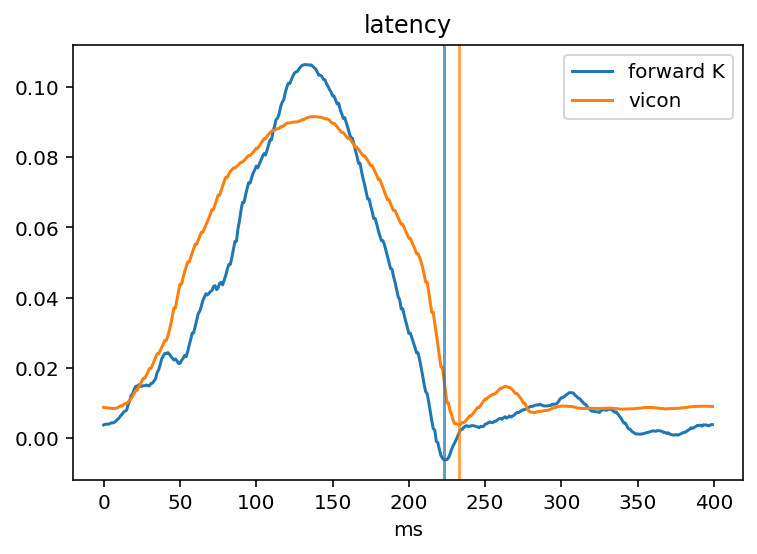

DescribeResult(nobs=12, minmax=(8, 11), mean=9.666666666666666, variance=0.7878787878787878, skewness=-0.12068685239272654, kurtosis=-0.6213017751479288)

In [8]:
values = []
for l in range(200, 4999, 400):  # l := left boundary
    r = l + 400
    s = slice(l, r)
    
    plt.plot(forwardK[s, 2], label='forward K')
    plt.plot(reader_vicon_leg[s, 2], label='vicon')
    
    arg1 = np.argmin(forwardK[s, 2])
    plt.axvline(arg1, color='C0', alpha=0.7)
    print('forwardK: overall', l + arg1, 'relative', arg1)
    
    
    arg2 = np.argmin(reader_vicon_leg[s, 2])
    plt.axvline(arg2, color='C1', alpha=0.7)
    print('vicon   : overall', l + arg2, 'relative', arg2)
    
    print('vicon - forwardK:', arg2 - arg1)
    
    values.append(arg2 - arg1)
    
    plt.title('latency')
    plt.xlabel('ms')
    plt.legend()
    plt.show()
    
describe(values)